<a href="https://colab.research.google.com/github/Sharath670/Zomato-Clustering-CP4/blob/main/Zomato_Clustering_(CP_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Dataset Clustering and Sentiment analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

For this project, I took 2 datasets from the company Zomato, which had information about reviews of different restaurants, and cuisines available of different restaurants, along with a few other columns.

Zomato is a restaurant aggregator that provides deliveries for their partner restaurants. It was founded in the year 2008. Nowadays, a lot of people prefer ordering from outside rather than visiting the restaurant. Ordering food from a restaurant or delivery service is convenient and saves time. People can simply place an order online or by phone and have their food delivered right to their doorstep. Zomato facilitates this.

I merged both the datasets initially, for ease of EDA( Exploratory Data Analysis). 

This dataset has 10,000 rows and 12 columns. This dataset also had null and duplicate values. 
I first performed EDA (exploratory data analysis) to visualize the features using charts and graphs. I created 13 different plots using the matplotlib and seaborn library. The plots I used are Barplot, Histogram, Pie chart, Donut chart, Scatterplot, Word Cloud and pairplot. I also used Correlation heatmap from the seaborn library to check if there were correlated variables in my dataset.

I then did some work on my data and converted few columns to their correct datatype.

Next, I checked for outliers. The metadata dataset had outliers in the 'Cost' column, which I dropped with the help of IQR ( Inter Quartile Range). I then performed categorical encoding for the cuisines column using one-hot encoding. 

I then did text preprocessing for my reviews dataset, which was to be used for sentiment analysis. The steps I followed are: Expand contraction, lower casing, removing punctuations, removing URLs and digits, removing stopwords and white spaces, tokenization, normalization(Lemmatization) and Text vectorization. I also created the dependent variable (Sentiment) which would have a value of 1 if the rating is 3.5 and above, and a value of 0 if the rating is below 3.5.

I then had to transform my Cost column from the clustering dataset, since it did not resemble a normal distribution. I used square root transformation to do the same. After the transformation, it resembled a normal distribution. I also scaled my Cost column using Standard Scaler since it would cause problems with my K means clustering algorithm if I did not do so.


Models:


For sentiment analysis, I used 2 models( Naive Bayes and Random Forest) . I got better accuracy using Random Forest, therefore I decided that that would be the model I would choose as my final prediction model.

For clustering, I used K means clustering and Heirarchical clustering. Using elbow plot, silhouette analysis, and dendrogram, I was able to conclude that the optimal number of clusters to create is 3 and I then created my model.




# **GitHub Link -**

https://github.com/Sharath670/Zomato-Clustering-CP4

# **Problem Statement**


**The objective is to use data about reviews of different restaurants for sentiment analysis and use data about the different types of cuisines and form clusters based on similar attributes to help the business.**

Sentiment analysis can help businesses gauge how their customers feel about their products or services.

 Clustering cuisines can help a business identify different customer segments based on their food preferences.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [105]:
# Import Libraries
import pandas as pd 
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns #for plotting
import numpy as np #working with arrays
import math
import scipy.stats as stats
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords #to get stopwords
import contractions

In [106]:
#importing drive to use the datasets
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [107]:
# Load dataset
dataset_metadata=pd.read_csv('/content/drive/MyDrive/ALMA BETTER/Zomato Restaurant names and Metadata.csv')
dataset_reviews=pd.read_csv('/content/drive/MyDrive/ALMA BETTER/Zomato Restaurant reviews.csv')

In [108]:
#merging both datasets on name column
dataset_reviews.rename(columns = {'Restaurant':'Name'}, inplace = True)
dataset_all=pd.merge(dataset_metadata,dataset_reviews,on='Name')

### Dataset First View

Reviews data

In [109]:
dataset_reviews.head() # checking first 5 rows

,Name,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [110]:
dataset_reviews.tail() # checking last 5 rows

,Name,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


Metadata data

In [111]:
dataset_metadata.head() # checking first 5 rows


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [112]:
dataset_metadata.tail() # checking last 5 rows

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


### dataset Rows & Columns count

In [113]:
# both dataset Rows & Columns count
print( 'The shape is', dataset_all.shape)
print('The number of columns are',len(dataset_all.columns))
print('The number of rows are',len(dataset_all.index))

The shape is (10000, 12)
The number of columns are 12
The number of rows are 10000


### dataset information

In [114]:
# dataset_all Info
dataset_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         10000 non-null  object
 1   Links        10000 non-null  object
 2   Cost         10000 non-null  object
 3   Collections  5000 non-null   object
 4   Cuisines     10000 non-null  object
 5   Timings      9900 non-null   object
 6   Reviewer     9962 non-null   object
 7   Review       9955 non-null   object
 8   Rating       9962 non-null   object
 9   Metadata     9962 non-null   object
 10  Time         9962 non-null   object
 11  Pictures     10000 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1015.6+ KB


#### Duplicate Values

In [115]:
# dataset_all Duplicate Value Count
print('The number of duplicated values are',len(dataset_all[dataset_all.duplicated()]))

The number of duplicated values are 36


#### Missing Values/Null Values

In [116]:
# Missing Values/Null Values Count
print('The number of null values are',dataset_all.isnull().sum().sum())

The number of null values are 5297


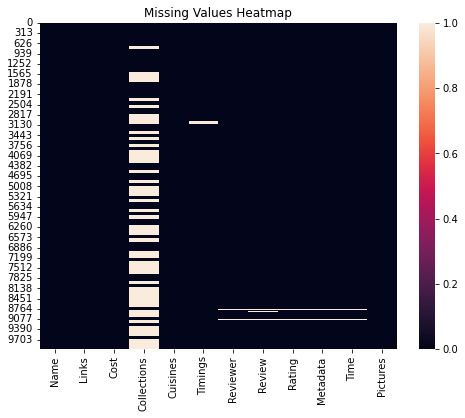

In [117]:
# Visualizing the missing values
plt.figure(figsize=(8, 6)) #size of the figure
sns.heatmap(dataset_all.isnull())
plt.title("Missing Values Heatmap")
plt.show()
     

### What did you know about your dataset?

This is a dataset that contains details of different restaurants that use zomato. It has 10000 rows and 12 columns. The dataset has 36 duplicate values and 5297 null values. 

Initally, I had 2 different dataset, which I then merged (for EDA) on the restaurant name columns to get a single dataset.

## ***2. Understanding Your Variables***

In [118]:
# dataset Columns
dataset_all.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures'],
      dtype='object')

In [119]:
# dataset Describe
dataset_all.describe(include='all')

,Name,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,10000,10000,5000,10000,9900,9962,9955,9962,9962,9962,10000.000000
unique,100,100,28,42,89,74,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",12 Noon to 12 Midnight,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,100,1200,400,400,500,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description 

**Restaurant Data**


**Name:** Name of Restaurants

**Links:** URL Links of Restaurants

**Cost:** Per person estimated cost of dining

**Collection:** Tagging of Restaurants wrt. Zomato
categories

**Cuisines:** Cuisines served by restaurants

**Timings:** Restaurant timings



**Review Data**

**Reviewer:** Name of the reviewer

**review:** Review text

**Rating:** Rating provided

**MetaData:** Reviewer metadata-No of reviews and
followers

**Time:** Date and Time of Review

**Pictures:** No of pictures posted with review

### Check Unique Values for each variable.

In [120]:
# Check Unique Values for each variable.
dataset_all.nunique()

Name            100
Links           100
Cost             28
Collections      42
Cuisines         89
Timings          74
Reviewer       7446
Review         9364
Rating           10
Metadata       2477
Time           9782
Pictures         36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [121]:
# Write your code to make your dataset analysis ready.
df=dataset_all.copy() # creating a copy of the dataset

In [122]:
# Distribution of different restaurants
df['Name'].value_counts()


Beyond Flavours                   100
Dine O China                      100
Driven Cafe                       100
Labonel                           100
Eat India Company                 100
                                 ... 
Pot Pourri                        100
Hunger Maggi Point                100
Behrouz Biryani                   100
3B's - Buddies, Bar & Barbecue    100
Chinese Pavilion                  100
Name: Name, Length: 100, dtype: int64

In [123]:
# Reviewer that occurs most amount of times
df['Reviewer'].value_counts().sort_values(ascending=False)[0:10]

Parijat Ray                       13
Ankita                            13
Kiran                             12
Vedant Killa                      11
Jay Mehta                         11
Manojkumar D Nambisan             10
Priyanka                          10
Age Of Foodies (Suraj Karambe)    10
Sravani                           10
Siva Kumar                        10
Name: Reviewer, dtype: int64

In [124]:
df['Rating']=pd.to_numeric(df['Rating'], errors='coerce') # converting rating to numeric
    

In [125]:
# Reviewer that posted most pictures
df.groupby('Reviewer')['Pictures'].sum().sort_values(ascending=False)[0:10]

Reviewer
Food Nawabs                                       157
Vamshi Puli                                        93
Anvith Devulapally                                 83
The Hungry Indians                                 83
Tavleen Kaur Gandhi                                53
Epicurean Tales                                    52
Siva Kumar                                         51
Tasty Hyderabad                                    51
Mohammed Masih Uddin (Hyderabadi Food Therapy)     51
Akshith                                            50
Name: Pictures, dtype: int64

In [126]:
df['Time']=pd.to_datetime(df['Time']) # converting time column to datetime

In [127]:
# gettimg columns for time and hour
df['Time of review']=df['Time'].dt.time 
df['Hour of review']=df['Time'].dt.hour

In [128]:
#Timing of reviews
df['Time of review'].value_counts().sort_values(ascending=False)[0:10]

22:46:00    28
22:23:00    26
21:49:00    25
22:29:00    24
21:18:00    23
14:27:00    22
22:40:00    22
22:27:00    22
21:11:00    21
22:37:00    21
Name: Time of review, dtype: int64

In [129]:
df['Cost']=df['Cost'].str.replace(',','')  #removing the commas

In [130]:
df['Cost']=pd.to_numeric(df['Cost'], errors='coerce') # converting cost to numeric

In [131]:
# Costliest restaurants
df.groupby('Name')['Cost'].mean().sort_values(ascending=False)[0:10]

Name
Collage - Hyatt Hyderabad Gachibowli                 2800.0
Feast - Sheraton Hyderabad Hotel                     2500.0
10 Downing Street                                    1900.0
Jonathan's Kitchen - Holiday Inn Express & Suites    1900.0
Cascade - Radisson Hyderabad Hitec City              1800.0
Zega - Sheraton Hyderabad Hotel                      1750.0
Mazzo - Marriott Executive Apartments                1700.0
B-Dubs                                               1600.0
Arena Eleven                                         1600.0
Barbeque Nation                                      1600.0
Name: Cost, dtype: float64

In [132]:
# Restaurants with highest average rating
df.groupby('Name')['Rating'].mean().sort_values(ascending=False)[0:10]

Name
AB's - Absolute Barbecues                  4.88
B-Dubs                                     4.81
3B's - Buddies, Bar & Barbecue             4.76
Paradise                                   4.70
Flechazo                                   4.66
The Indi Grill                             4.60
Zega - Sheraton Hyderabad Hotel            4.45
Over The Moon Brew Company                 4.34
Beyond Flavours                            4.28
Cascade - Radisson Hyderabad Hitec City    4.26
Name: Rating, dtype: float64

In [133]:
# Restaurants with lowest average rating
df.groupby('Name')['Rating'].mean().sort_values(ascending=True)[0:10]

Name
Hotel Zara Hi-Fi                         2.400
Asian Meal Box                           2.580
Pakwaan Grand                            2.710
Mathura Vilas                            2.820
Behrouz Biryani                          2.825
Shree Santosh Dhaba Family Restaurant    2.830
The Chocolate Room                       2.830
KFC                                      2.850
Club Rogue                               2.880
Desi Bytes                               2.900
Name: Rating, dtype: float64

In [134]:
# Cheapest restaurants
df.groupby('Name')['Cost'].mean().sort_values(ascending=True)

Name
Amul                                                  150.0
Mohammedia Shawarma                                   150.0
Hunger Maggi Point                                    200.0
KS Bakers                                             200.0
Momos Delight                                         200.0
                                                      ...  
Cascade - Radisson Hyderabad Hitec City              1800.0
Jonathan's Kitchen - Holiday Inn Express & Suites    1900.0
10 Downing Street                                    1900.0
Feast - Sheraton Hyderabad Hotel                     2500.0
Collage - Hyatt Hyderabad Gachibowli                 2800.0
Name: Cost, Length: 100, dtype: float64

In [135]:
# Most common cuisines
df['Cuisines'].str.split(',')

# Flatten the list of cuisines
cuisines = [item.strip() for sublist in df['Cuisines'].str.split(',') for item in sublist]

# Count the number of occurrences of each cuisine
cuisine_counts = pd.Series(cuisines).value_counts()
cuisine_counts[0:10]

North Indian    6000
Chinese         4100
Continental     2100
Biryani         1500
Asian           1400
Italian         1400
Desserts        1300
Fast Food       1300
South Indian     900
Mughlai          600
dtype: int64

### What all manipulations have you done and insights you found?

**Manipulations done:**

I created a copy of my dataset.

Converted the column 'Rating' to numerical.

Changed the column 'Time' to datetime format and created another column called 'Time of review' which contains the exact time in HH:MM:SS format.

I also created a column called 'Hour of Review' by taking the hour from the Time column.

I converted the column 'Cost' into numeric format.


**Insights found:**

1. This dataset has an equal count of all the restaurants, with each restaurant name occuring equal number of times in the dataset.

2. Parijat Ray is the reviewer who has reviewed the most number of times.

3. Food Nawabs have posted 157 pictures, which is higher than all other reviewers.

4. Most of the reviews are uploaded at night time.

5. Collage - Hyatt Hyderabad Gachibowli is the costiest restaurant.

6. Absolute Barbecues has the highest average rating.

7. Hotel Zara has the lowest average rating.

8. Amul is the cheapest restaurant, with an average cost of rupees 150 per person.

9. North Indian Cuisine is the most commonly occuring cuisine in the dataset. 






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar plot of count of restaurants

Text(0.5, 1.0, 'Distribution of Restaurants')

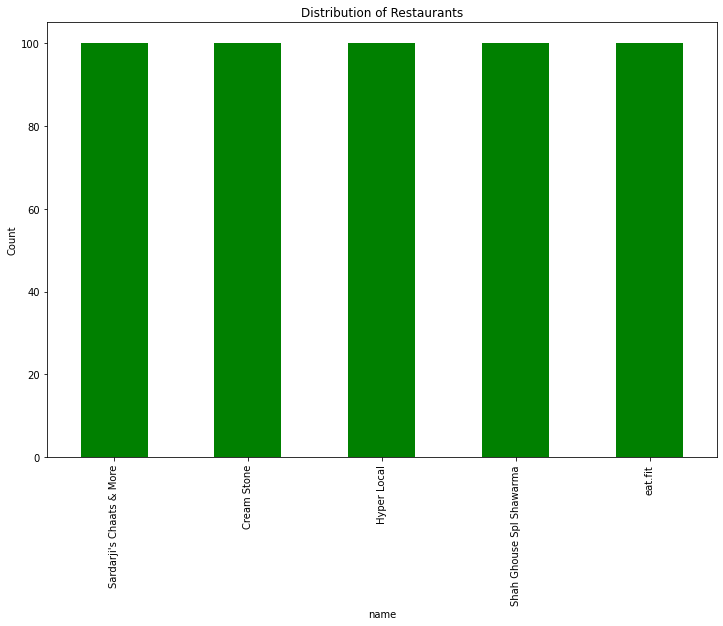

In [136]:
# Chart - 1 visualization code
plt.figure(figsize=(12, 8)) # plot size
df['Name'].value_counts()[65:70].plot.bar(color='green') #plot type
plt.xlabel('name')
plt.ylabel('Count')
plt.title('Distribution of Restaurants')
     

##### 1. Why did you pick the specific chart?

I used a bar chart since it is easy to visualize the counts of categorical variables, where the hight of the rectangular bars are proportional to the amount on the Y axis. It can easily be used to visualize which category has more frequency in the dataset_all.

##### 2. What is/are the insight(s) found from the chart?

From this chart I can see that all the restaurants have equal number of observations in the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this particular plot, I cannot make any business decision, I can only use it to understand how the count of the variables.

#### Chart - 2 - Histogram of Cost

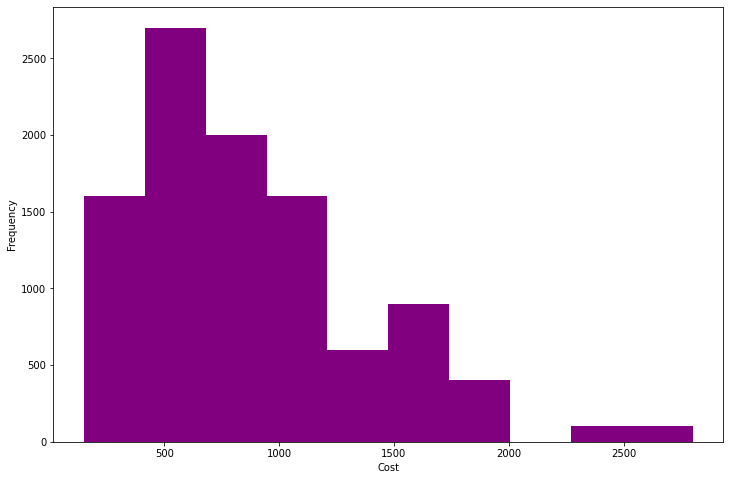

In [137]:
# Chart - 2 visualization code
plt.figure(figsize=(12, 8)) # plot size
plt.hist(df['Cost'],bins=10,color='purple') #plot type and colour
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram shows us the count of values that lie in different ranges. It is used to represent numerical data and is commonly used for performing univariate analysis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that a high number of restaurants cost between 500-750  whereas very few restaurant have a cost of 2000+ per person.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is good , since we can see that most restaurants have low priced food. Zomato can also try to bring in costlier restaurants for people willing to spend more monry.

#### Chart - 3 Pie chart of percentage of ratings

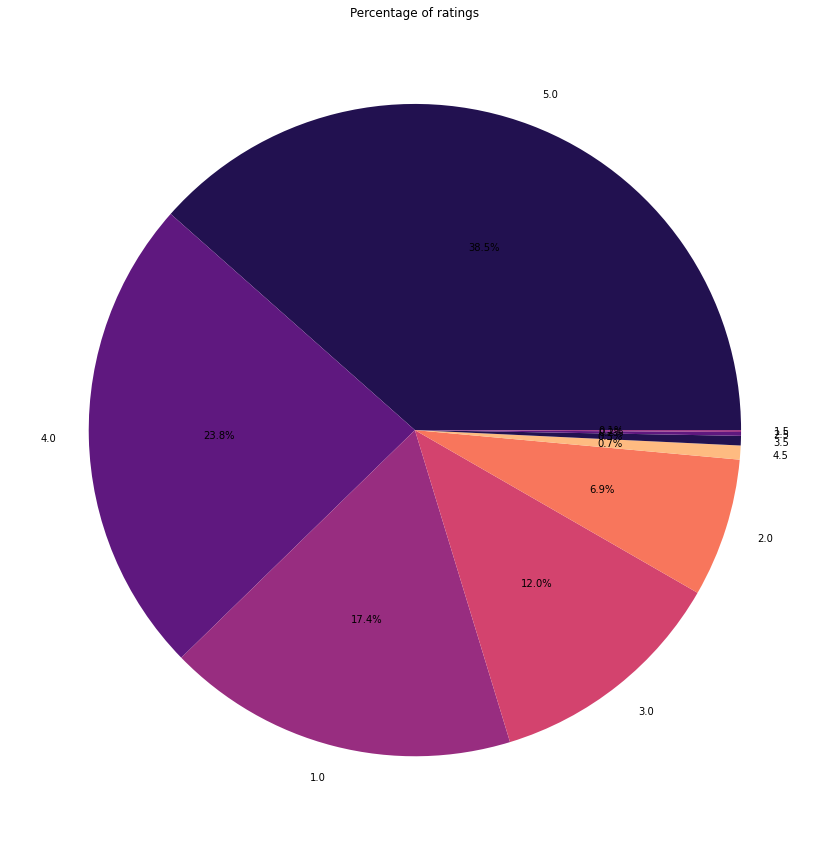

In [138]:
# Chart - 3 visualization code
plt.figure(figsize=(15,15)) #plot size
q=df['Rating'].value_counts()
plt.pie(q.values, labels=q.index, autopct='%1.1f%%') #plot type with percentage
plt.title('Percentage of ratings')
plt.show()

##### 1. Why did you pick the specific chart?

I used a pie chart for this visualization to clearly show the percentage distrbution of the ratings given.

A pie chart is a very simple visualization and easy to understand since different variables are represented using sectors that have different colours.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that 5 star rating is given more frequently(38.5) compared to other ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is good for zomato, since we can see that people are mostly happy and satisfied with the restaurants, with 4 and 5 stars making up most of the ratings.

#### Chart - 4  Scatterplot of rating vs pictures

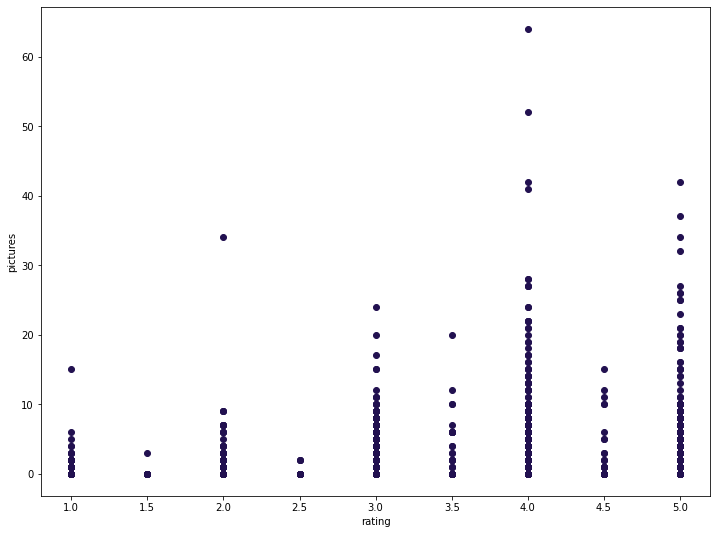

In [139]:
# Chart - 4 visualization code
plt.figure(figsize=(12, 9)) #plot size
plt.scatter(df['Rating'],df['Pictures']) #plot type
plt.xlabel('rating')
plt.ylabel('pictures')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a scatterplot which is commonly used to represent bivariate data.Through a scatterplot, we can also see how one variable affects the other. We can use this to come to certain conclusions about how the variables are related.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that people prefer to take pictures mostly when they give higher ratings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

From this chart, we can see that, when people are not satisfied with the restaurant, they do not take pictures either.

Zomato should encourage them to take pictures of the food of the restaurant when they are not satisfied, since it helps zomato understand their grievance better.

#### Chart - 5 - WordCloud of Cuisines

In [140]:
from wordcloud import WordCloud

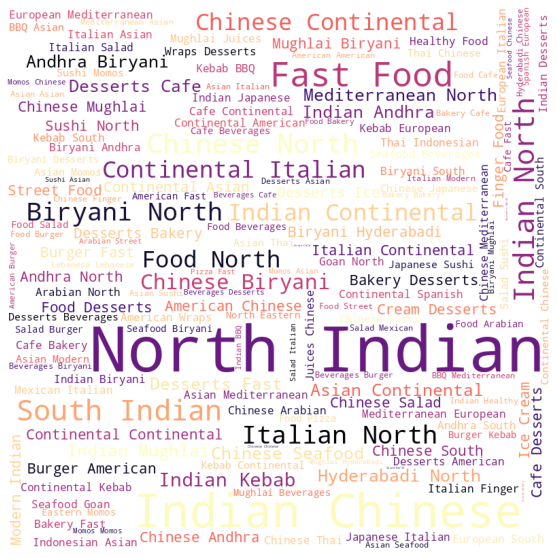

In [141]:
words_string = " ".join(cuisines)

# Create a word cloud object
wordcloud = WordCloud(width=800, height=800, background_color='white',colormap='magma').generate(words_string) # setting parameters and colours

# Display the generated image
plt.figure(figsize=(15,10)) #size of plot
plt.imshow(wordcloud) # type of plot
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

I used a wordcloud to visualize the cuisines. Word clouds are used as a visual representation of text data, where the size of each word represents its frequency or importance in the text. They are often used to quickly identify the most frequently occurring words or themes in a given text or corpus.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can clearly see that North Indian food has the highest frequency followed by Indian Chinese.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can use this data to see which cuisines are the most common among the restaurants that use their app. They can also try and include more restaurants which serve uncommon cuisines to try and diversify their business.

#### Chart - 6 Bar Plot of Costliest Restaurants

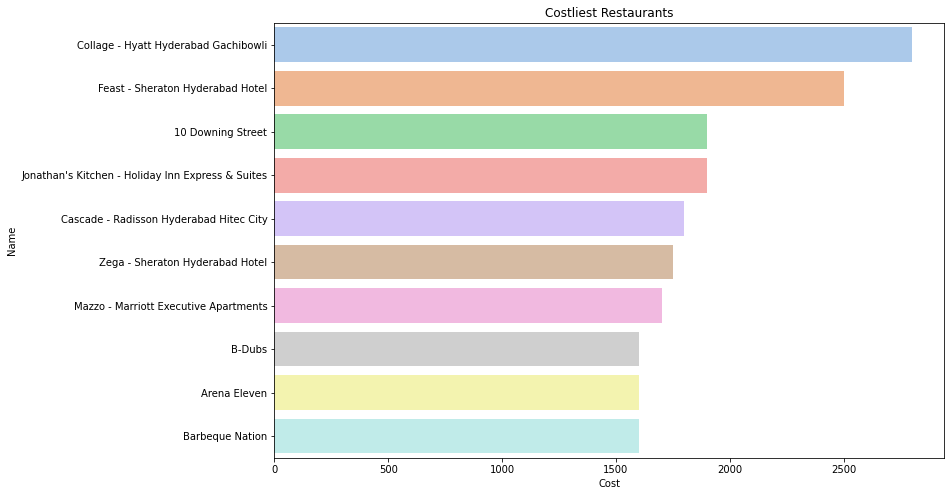

In [142]:
# Chart - 6 visualization code
plt.figure(figsize=(12,8)) #size
q=df.groupby('Name')['Cost'].mean().sort_values(ascending=False).reset_index()[0:10]
sns.set_palette("pastel") # colour setting
sns.barplot(x =q['Cost'], y=q['Name']) # plot type
plt.title('Costliest Restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

I used a barchart as it is good to represent categorical data, and easy to interpret. In a barchart the height of the rectangular boxes are proportional to the amount on the opposite axis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can clearly see that Collage restaurant is the costliest, followed by Feast and 10 downing street, with the costliest restaurant having a cost per person of Rs. 2500+.

#### Chart - 7 - Bar Plot of Cheapest Restaurants

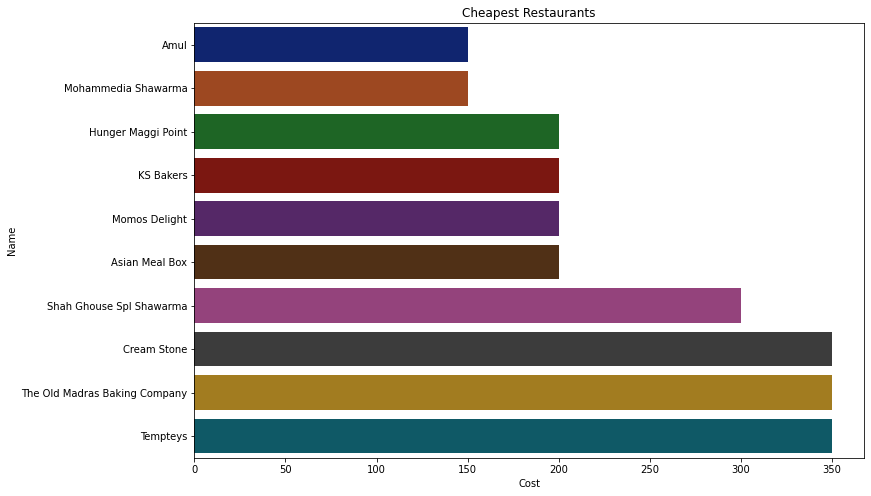

In [143]:
# Chart - 7 visualization code
plt.figure(figsize=(12,8))
q=df.groupby('Name')['Cost'].mean().sort_values(ascending=True).reset_index()[0:10]
sns.set_palette("dark") # colour setting
sns.barplot(x =q['Cost'], y=q['Name']) # plot type
plt.title('Cheapest Restaurants')
plt.show()

##### 1. Why did you pick the specific chart?

I used a barchart as it is good to represent categorical data, and easy to interpret. In a barchart the height of the rectangular boxes are proportional to the amount on the opposite axis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that Amul is the cheapest, followed by Mohammedia Shawarma.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato can use this insight to see which restaurants are cost effective.

#### Chart - 8 - Pie chart of Hour of review

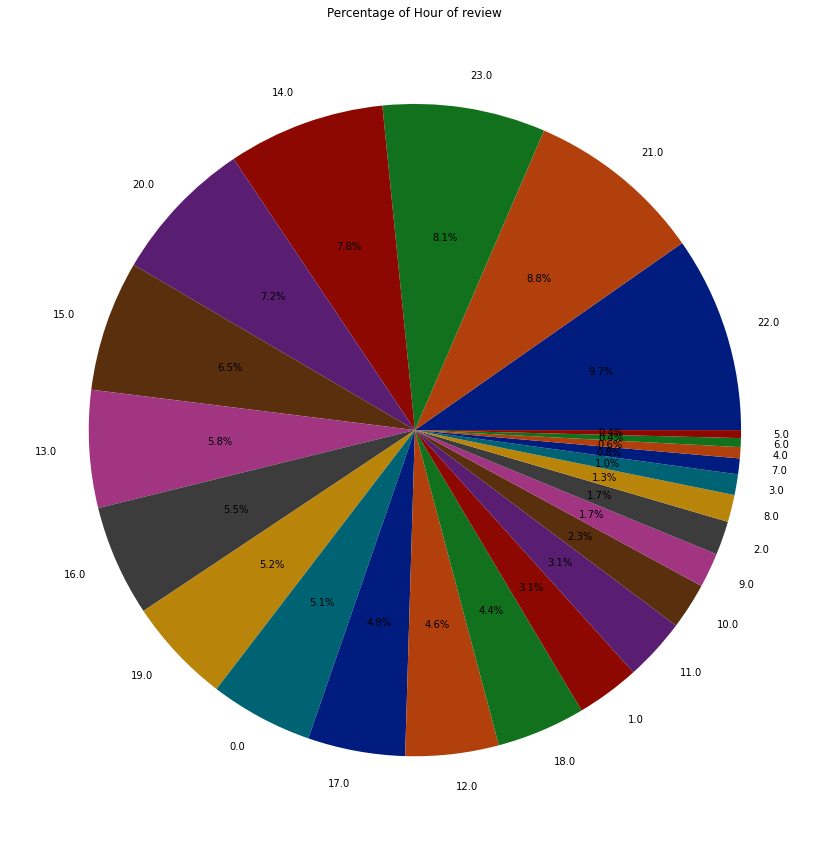

In [144]:
# Chart - 8 visualization code
plt.figure(figsize=(15,15)) #plot size
q=df['Hour of review'].value_counts()
plt.pie(q.values, labels=q.index, autopct='%1.1f%%') #plot type
plt.title('Percentage of Hour of review')
plt.show()

##### 1. Why did you pick the specific chart?

I used a pie chart for this visualization to clearly show the percentage distribution of the hour in which reviewers posted their reviews. 
A pie chart is a very simple visualization and easy to understand since different variables are represented using sectors that have different colours.

##### 2. What is/are the insight(s) found from the chart?

I can see that most people prefer to write reviews at 10pm, and very few people upload reviews at 5am. 

#### Chart - 9 - WordCloud of collections

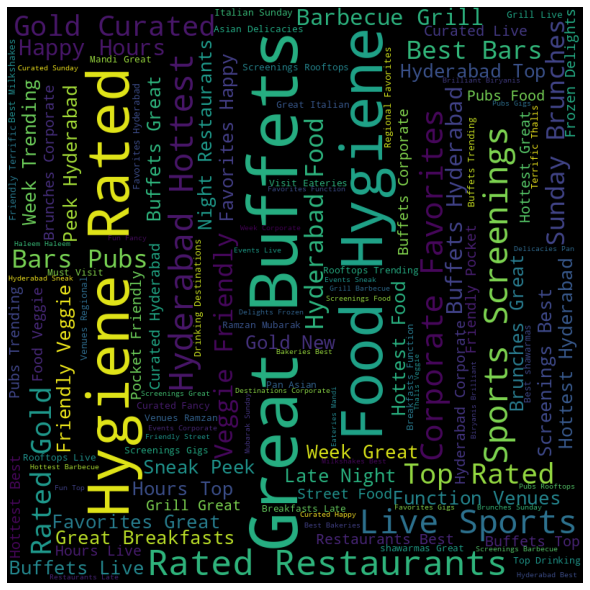

In [145]:
# Chart - 9 visualization code
collections_text = ' '.join(df['Collections'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                min_font_size = 10).generate(collections_text) # colour and other parameters

# Plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)  # size of figure 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

# Show the plot
plt.show()







##### 1. Why did you pick the specific chart?

I used a wordcloud to visualize the collection in which the restaurants belong to. Word clouds are used as a visual representation of text data, where the size of each word represents its frequency or importance in the text. They are often used to quickly identify the most frequently occurring words or themes in a given text or corpus.

##### 2. What is/are the insight(s) found from the chart?

I can see that Sports Screenings, Great Buffets, and Hyderabad Hottest are some of the most common tags given to restaurants.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato  and restaurant owners can use this information to see which tags are most important to people which affects their decision to choose a particular restaurant.

#### Chart - 10 - Donut Chart of top 10 reviewers by picture count

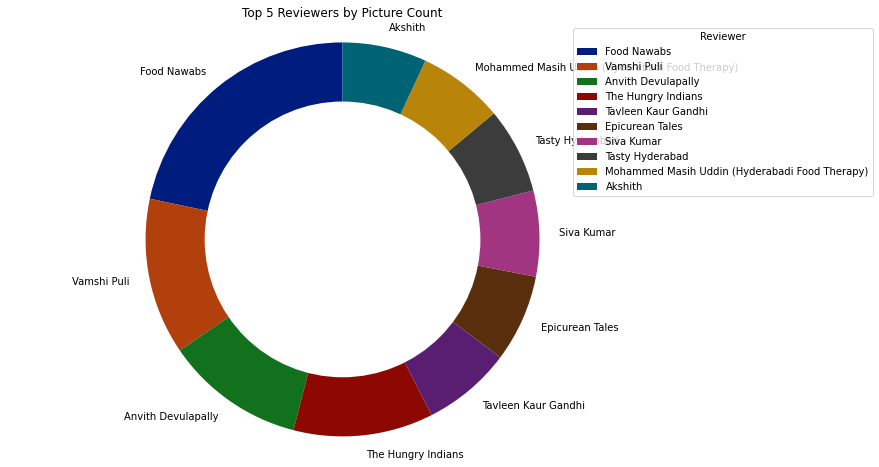

In [146]:
# Chart - 10 visualization code
reviewer_pics=df.groupby('Reviewer')['Pictures'].sum().sort_values(ascending=False).reset_index()[0:10]
reviewer_pics
plt.figure(figsize=(12,8)) #size of plot
plt.pie(reviewer_pics['Pictures'], labels=reviewer_pics['Reviewer'], startangle=90)
plt.axis('equal')
plt.title('Top 5 Reviewers by Picture Count') # title
plt.legend(title='Reviewer', loc='upper right', bbox_to_anchor=(1.3, 1))
centre_circle = plt.Circle((0,0),0.70,fc='white') # colour of the center
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 1. Why did you pick the specific chart?

A Donut chart is essentially a Pie Chart with an area of the center cut out. I have used it to visualize the top 10 reviewers based on the amount of pictures taken.

##### 2. What is/are the insight(s) found from the chart?

I can see that Food Nawabs have taken the most amount of pictures followed by Vamshi Puli.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Restaurants should encourage their customers to take pictures of the restaurant when they visit, to increase their popularity and and visibility, and also incentivize customers to do so.

#### Chart - 11 - Barplot of the restaurants with lowest rating.

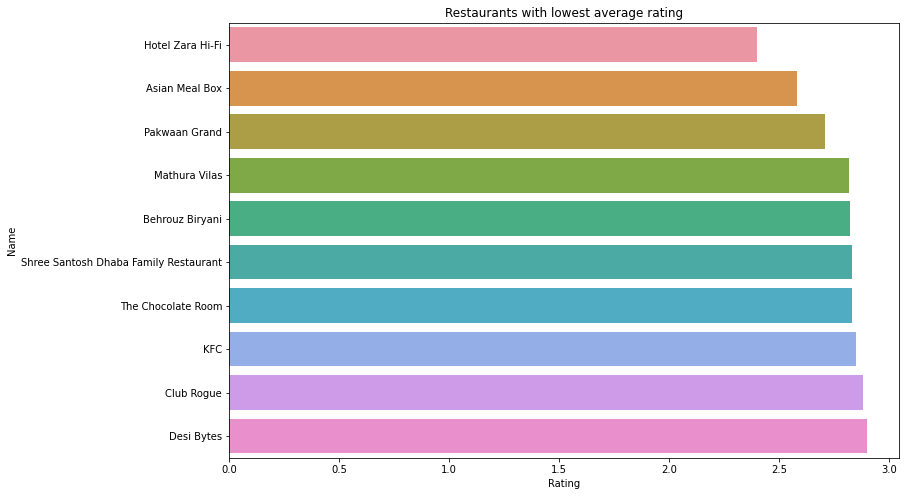

In [147]:
# Chart - 11 visualization code
plt.figure(figsize=(12,8)) # size
q=df.groupby('Name')['Rating'].mean().sort_values(ascending=True).reset_index()[0:10]
sns.set_palette("magma") # colour
sns.barplot(x =q['Rating'], y=q['Name']) # plot type
plt.title('Restaurants with lowest average rating')
plt.show()


##### 1. Why did you pick the specific chart?

I used a barchart as it is good to represent categorical data, and easy to interpret. In a barchart the height of the rectangular boxes are proportional to the amount on the opposite axis.

##### 2. What is/are the insight(s) found from the chart?

From this chart, I can see that the worst rated restaurant is Hotel Zara Hi-fi, with an average rating of just 2.5.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Zomato should find the reason as to why these particular restaurants are having low ratings, since it is bad for the company to partner with restaurants that are not up to the mark.

#### Chart - 12 - Correlation Heatmap

<AxesSubplot:>

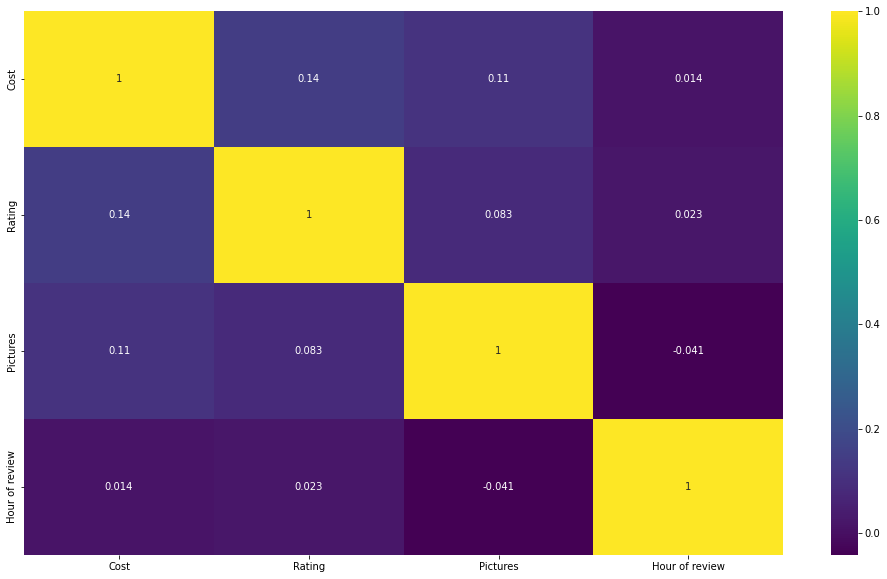

In [148]:
# Correlation Heatmap visualization code
plt.figure(figsize=(17,10)) #plot size
sns.heatmap(df.corr(),annot=True,cmap='viridis') #plot type


##### 1. Why did you pick the specific chart?

I used a correlation heatmap to visualize the correlations between the variables and to find out if there are any significant positive or negative relationships between variables.



##### 2. What is/are the insight(s) found from the chart?

From the chart, it is clear that there are no significant relationships between the numerical columns in the dataset_all.

#### Chart - 13 - Pair Plot 

<Figure size 864x576 with 0 Axes>

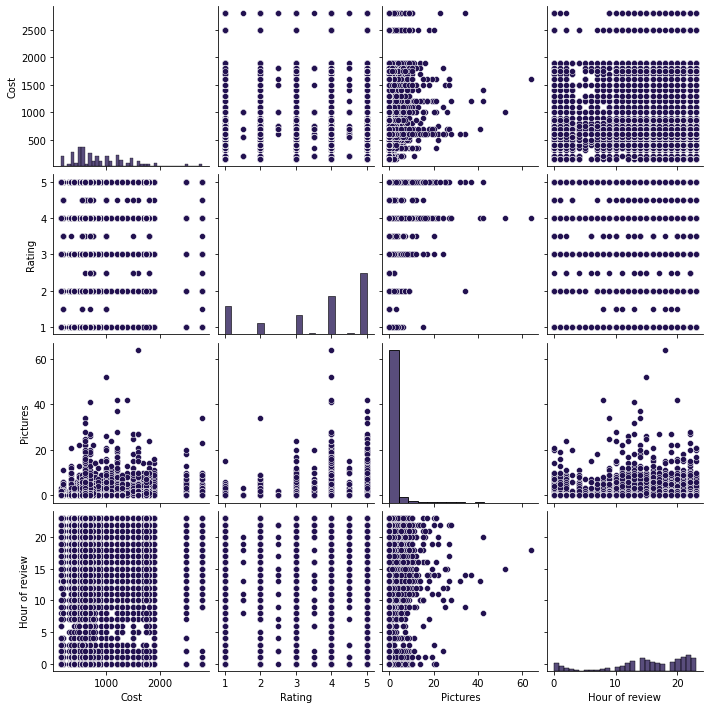

In [149]:
# Pair Plot visualization code
plt.figure(figsize=(12,8))
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

A pairplot shows you multiple bivariate distributions. It basically shows us the graphs of each bivariate distributions unlike a correlation heatmap which shows us only the values. We can look at each of these plots to check if there are any correlations.

##### 2. What is/are the insight(s) found from the chart?

The insights from this chart are pretty much similar to the insights obtained using the correlation heatmap. There are no significant correlations among the variables in the dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset_all. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The average number of pictures taken is 3.
2. The average restaurant rating is 4
3. The average cost of restaurants is 1000

### Hypothetical Statement - 1

The average number of pictures taken is 3. 

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=3

Alternate Hypothesis: mean !=3

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [150]:
# Perform Statistical Test to obtain P-Value
x_bar = df['Pictures'].mean() #mean
mu = 3
population_sd= df['Pictures'].std()
n=len(df['Pictures'][0:30])

t=(x_bar - mu)/(population_sd/math.sqrt(n)) 

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) #calculation of p value
p_value

4.4524569386972246e-05

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have rejected the null hypothesis as the p value is less than 0.05

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of Pictures is significantly different from a known population mean.

### Hypothetical Statement - 2

The average restaurant rating is 4

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=4

Alternate Hypothesis: mean !=4

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [151]:
# Perform Statistical Test to obtain P-Value
x_bar = df['Rating'].mean() #mean
mu =4
population_sd= df['Rating'].std()
n=len(df['Rating'][:30])

t=(x_bar - mu)/(population_sd/math.sqrt(n)) 

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) #calculation of p value
p_value

0.15151687471234854

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have failed to reject the null hypothesis as the p value is more than 0.05

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of Rating is significantly different from a known population mean.

### Hypothetical Statement - 3

The average cost of restaurants is 1000

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis: mean=1000

Alternate Hypothesis: mean !=1000

Type of test: 2 tailed test

#### 2. Perform an appropriate statistical test.

In [152]:
# Perform Statistical Test to obtain P-Value
x_bar = df['Cost'].mean() #mean
mu =1000
population_sd= df['Cost'].std()
n=len(df['Cost'][:30])

t=(x_bar - mu)/(population_sd/math.sqrt(n)) 

p_value = 2 * (1 - stats.t.cdf(abs(t), n-1)) #calculation of p value
p_value

0.17432169764510408

##### Which statistical test have you done to obtain P-Value?

I have performed a t-test to obtain p value. I have failed to reject the null hypothesis as the p value is more than 0.05

##### Why did you choose the specific statistical test?

I chose the t-test for this hypothesis testing because we are trying to determine if the sample mean of cost is significantly different from a known population mean.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

For reviews dataset

In [153]:
df_reviews=dataset_reviews.copy() # creating a copy of reviews dataser

In [154]:
df_reviews['Rating'] = pd.to_numeric(df_reviews['Rating'], errors='coerce') # converting rating to numeriv

In [155]:
# Handling Missing Values & Missing Value Imputation
# checking total number of null values
df_reviews.isnull().sum().sum()

198

In [156]:
df_reviews.isnull().sum() # null values by column

Name         0
Reviewer    38
Review      45
Rating      39
Metadata    38
Time        38
Pictures     0
dtype: int64

In [157]:
len(df_reviews[df_reviews.duplicated()]) # duplicate values



36

In [158]:
# dropping the duplicate rows
df_reviews = df_reviews.drop_duplicates()

In [159]:
len(df_reviews[df_reviews.duplicated()])

0

In [160]:
# Since there are only a few na values, dropping them
df_reviews = df_reviews.dropna()

In [161]:
df_reviews.isnull().sum()

Name        0
Reviewer    0
Review      0
Rating      0
Metadata    0
Time        0
Pictures    0
dtype: int64

In [162]:
df_reviews.shape

(9954, 7)

Now there are no missing or duplicated values in the reviews dataset.

For metadata dataset:

In [163]:
df_metadata=dataset_metadata.copy() # creating a copy of the dataset

In [164]:
df_metadata['Cost'] = df_metadata['Cost'].str.replace(',', '')
# Convert the 'cost' column to numeric format
df_metadata['Cost'] = pd.to_numeric(df_metadata['Cost'],errors='coerce')

In [165]:
df_metadata.shape

(105, 6)

In [166]:
# Handling Missing Values & Missing Value Imputation
df_metadata.isnull().sum().sum()

55

In [167]:
df_metadata.isnull().sum() # checking null values by column

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [168]:
len(df_metadata[df_metadata.duplicated()]) # no duplicates

0

In [169]:
# Dropping collections column due to too many null values
df_metadata.drop('Collections',axis=1,inplace=True)


In [170]:
df_metadata.shape

(105, 5)

In [171]:
# Imputing the na column in timings with mode:
mode = df_metadata['Timings'].mode()[0]

# Replace missing values in 'timings' column with its mode
df_metadata['Timings'].fillna(mode, inplace=True)

In [172]:
df_metadata.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

For reviews dataset:

There were a few duplicated and a few null values, I dropped those rows since there were not too many, so dropping them won't make much of an impact on the dataset.

For metadata dataset:

Converted cost to numeric.

There were no duplicated values. There were too many null values in collections column,so I dropped it.

There was a null value in Timings column, which I imputed using mode of that column.

### 2. Handling Outliers

For reviews dataset.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

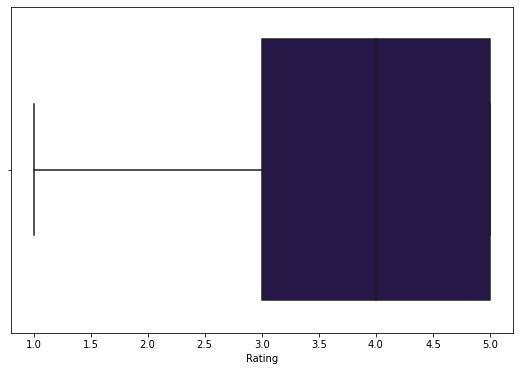

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

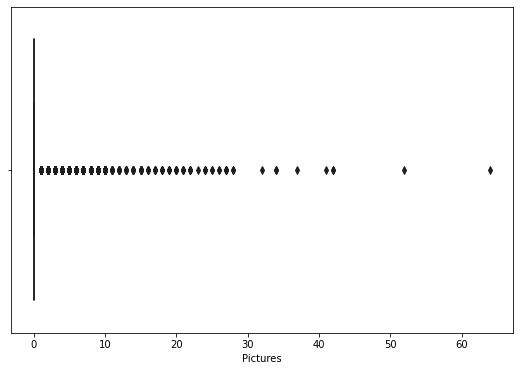

In [173]:
# Handling Outliers & Outlier treatments
# using boxplot to check
numerical=df_reviews.describe().columns.values
for i in numerical:
  plt.figure() # plots figure for each iteration
  plt.figure(figsize=(9,6))  
  sns.boxplot(df_reviews[i]) #plot type
  plt.show()


For metadata dataset

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

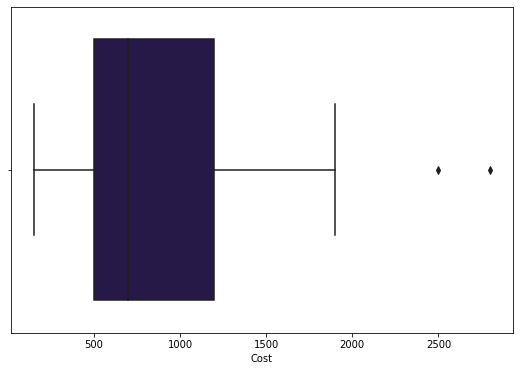

In [174]:
# using boxlplot to check
numerical=df_metadata.describe().columns.values
for i in numerical:
  plt.figure() # plots figure for each iteration
  plt.figure(figsize=(9,6))  
  sns.boxplot(df_metadata[i]) #plot type
  plt.show()

In [175]:
# removing outliers in cost column
Q1 = np.percentile(df_metadata['Cost'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(df_metadata['Cost'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(df_metadata['Cost'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df_metadata['Cost'] <= (Q1-1.5*IQR))
 
# Removing the Outliers
df_metadata.drop(upper[0], inplace = True)
df_metadata.drop(lower[0], inplace = True)
     

<ipython-input-175-c2bcd1e52769>:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df_metadata['Cost'], 25,
<ipython-input-175-c2bcd1e52769>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df_metadata['Cost'], 75,


##### What all outlier treatment techniques have you used and why did you use those techniques?

Reviews dataset:

I did not have to use any outlier treatment techniques due to the nature of the numerical feature.

Metadata dataset:

There were only a few outliers in the Cost column. I used IQR (inter quartile range) to drop the rows which had outliers in the dataset. IQR is used to measure variability by dividing a data set into quartiles. This approach is very commonly used for outlier removal and is a very trusted method . I have dropped the values that are above the upper bound and below the lower bound measurements.

### 3. Categorical Encoding

In [176]:
#Selecting the columns needed for clustering
df_clust=df_metadata[['Cost','Cuisines']]

In [177]:
# Convert cuisines column to string
df_clust

,Cost,Cuisines
0,800,"Chinese, Continental, Kebab, European, South I..."
1,800,"Biryani, North Indian, Chinese"
2,1300,"Asian, Mediterranean, North Indian, Desserts"
3,800,"Biryani, North Indian, Chinese, Seafood, Bever..."
4,1200,"Asian, Continental, North Indian, Chinese, Med..."
...,...,...
100,600,"Fast Food, Salad"
101,200,"Bakery, Mithai"
102,500,"North Indian, Biryani, Chinese"
103,250,Fast Food


In [178]:
# split the Cuisine column into multiple columns
cuisine_df = df_clust["Cuisines"].str.get_dummies(", ")

# drop duplicated columns
cuisine_df = cuisine_df.loc[:,~cuisine_df.columns.duplicated()]

# concatenate the original DataFrame with the one-hot encoded columns
df_clust = pd.concat([df_clust, cuisine_df], axis=1)


In [179]:
pd.set_option("display.max_columns", None)
df_clust

,Cost,Cuisines,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Healthy Food,Hyderabadi,Ice Cream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Malaysian,Mediterranean,Mexican,Mithai,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,800,"Chinese, Continental, Kebab, European, South I...",0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,800,"Biryani, North Indian, Chinese",0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1300,"Asian, Mediterranean, North Indian, Desserts",0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,800,"Biryani, North Indian, Chinese, Seafood, Bever...",0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,1200,"Asian, Continental, North Indian, Chinese, Med...",0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,600,"Fast Food, Salad",0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
101,200,"Bakery, Mithai",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
102,500,"North Indian, Biryani, Chinese",0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
103,250,Fast Food,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used one hot encoding for the Cuisines Column. This is preferred when the column does hot have ordinal features.

One-hot encoding is used to convert categorical data into numerical data that can be used in machine learning algorithms. One-hot encoding this column creates a new binary column for each unique value in the Cuisines column.

By using one-hot encoding on the Cuisine column, we can incorporate this categorical information into machine learning models, such as classification or clustering algorithms, that require numerical input.




### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset_all i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [180]:
# Taking only necessary columns
sent_df=df_reviews[['Review','Rating']]



In [181]:
# performing contraction
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [182]:
def expand_contractions(text):
    return contractions.fix(text)

# apply the function to the 'review' column
sent_df['Review'] = sent_df['Review'].apply(expand_contractions)

<ipython-input-182-a65a2c01c5e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(expand_contractions)


#### 2. Lower Casing

In [183]:
# Lower Casing
sent_df['Review'] = sent_df['Review'].str.lower()

<ipython-input-183-30a99c3fee12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].str.lower()


#### 3. Removing Punctuations

In [184]:
# Remove Punctuations
import string
def remove_punctuations(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# apply the function to the 'review' column
sent_df['Review'] = sent_df['Review'].apply(remove_punctuations)

<ipython-input-184-337feb4bb53a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(remove_punctuations)


#### 4. Removing URLs & Removing words and digits contain digits.

In [185]:
# Remove URLs & Remove words and digits contain digits
import re
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

# apply the function to the 'review' column
sent_df['Review'] = sent_df['Review'].apply(remove_urls)


<ipython-input-185-77400ed80342>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(remove_urls)


In [186]:
# Removing digits
remove_digits = lambda x: ''.join([i for i in x if not i.isdigit()])

# apply the function to the 'review' column
sent_df['Review'] = sent_df['Review'].apply(remove_digits)


<ipython-input-186-feddb28ad58e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(remove_digits)


#### 5. Removing Stopwords & Removing White spaces

In [187]:
# Remove Stopwords
import nltk
nltk.download('stopwords')







[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [188]:
def remove_stopwords(text):
    """
    This function removes stopwords from a given text.
    """
    stop_words = set(stopwords.words('english'))
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

sent_df['Review']=sent_df['Review'].apply(remove_stopwords)


<ipython-input-188-e4a5876cc521>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review']=sent_df['Review'].apply(remove_stopwords)


In [189]:
# Remove White spaces
sent_df['Review'] = sent_df['Review'].str.strip()

<ipython-input-189-0e1d06540607>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].str.strip()


#### 6. Rephrase Text

In [190]:
# Rephrase Text


#### 7. Tokenization

In [191]:
# Tokenization
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [192]:
def tokenize_text(text):
    """
    This function tokenizes a given text into words.
    """
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply function to the column
sent_df['Review'] = sent_df['Review'].apply(tokenize_text)


<ipython-input-192-ff5c66639918>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(tokenize_text)


#### 8. Text Normalization

In [193]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [194]:
def lemmatize_text(tokens):
    """
    This function lemmatizes a given text by reducing each word to its root form.
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

# Apply function to the column
sent_df['Review'] = sent_df['Review'].apply(lemmatize_text)

<ipython-input-194-525055d50903>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Review'] = sent_df['Review'].apply(lemmatize_text)


In [195]:
sent_df

,Review,Rating
0,ambience good food quite good saturday lunch c...,5.0
1,ambience good pleasant evening service prompt ...,5.0
2,must try great food great ambience thnx servic...,5.0
3,soumen da arun great guy behavior sincerety go...,5.0
4,food goodwe ordered kodi drumstick basket mutt...,5.0
...,...,...
9995,madhumathi mahajan well start nice courteous s...,3.0
9996,place never disappointed u food courteous staf...,4.5
9997,bad rating mainly chicken bone found veg food ...,1.5
9998,personally love prefer chinese food couple tim...,4.0


##### Which text normalization technique have you used and why?

I used lemmatization to perform normalization. Lemmatization is the process of reducing words to their base form or lemma, by taking into account the context and part of speech of the word. For example, the lemma of "ran" is "run". 

The reason I chose lemmatization is because it can produce more accurate results than stemming.

#### 9. Part of speech tagging

In [196]:
# not doing
# POS Taging


#### 10. Text Vectorization

In [197]:


vectorizer = TfidfVectorizer( lowercase=True, stop_words='english')

X = vectorizer.fit_transform(sent_df['Review'])


##### Which text vectorization technique have you used and why?

I used TF-IDF vectorizer. TF-IDF vectorizer takes into account the importance of each token in the corpus. It does this by calculating a score for each token that reflects how often it appears in a document (TF) and how rare it is in the corpus (IDF). The TF-IDF score is higher for tokens that appear frequently in a document but rarely in the corpus, and lower for tokens that are common in both the document and the corpus.

I chose it over CountVectorizes because it takes into account the importance of each token in the corpus and provides a more informative representation of the text data.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

For review dataset

In [198]:
# Manipulate Features 
sent_df['Sentiment']=sent_df['Rating'].apply(lambda x: 1 if x >= 3.5 else 0) # creating a new column called sentiment. 1 if greater or equal to 3.5 or else, 0.




<ipython-input-198-98a8b7d7a96b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Sentiment']=sent_df['Rating'].apply(lambda x: 1 if x >= 3.5 else 0) # creating a new column called sentiment. 1 if greater or equal to 3.5 or else, 0.


In [199]:
sent_df.drop('Rating',axis=1,inplace=True) # dropping rating column

/usr/local/lib/python3.9/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [200]:
y=sent_df['Sentiment'] # setting this as my dependent variable

For metadata dataset:

In [201]:
#dropping cuisines column
df_c=df_clust.copy()
df_clust.drop('Cuisines',axis=1,inplace=True)

#### 2. Feature Selection

In [202]:
# Select your features wisely to avoid overfitting
# The features I selected are

df_clust.columns

Index(['Cost', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery',
       'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental',
       'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan',
       'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian',
       'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean',
       'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai',
       'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

##### Which all features you found important and why?

The features I found important are the cost column and all the cuisines. This will be used for clustering.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


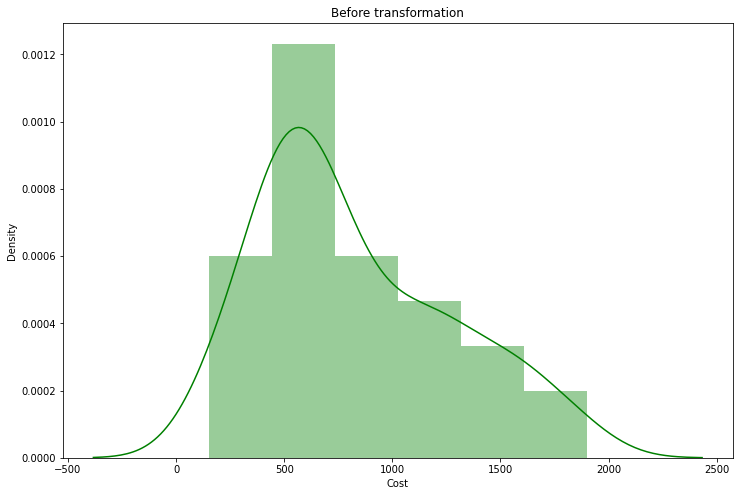

In [203]:
# Transform Your data
plt.figure(figsize=(12,8))
sns.distplot(df_clust['Cost'],color="g")
plt.title('Before transformation')
plt.show()



/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


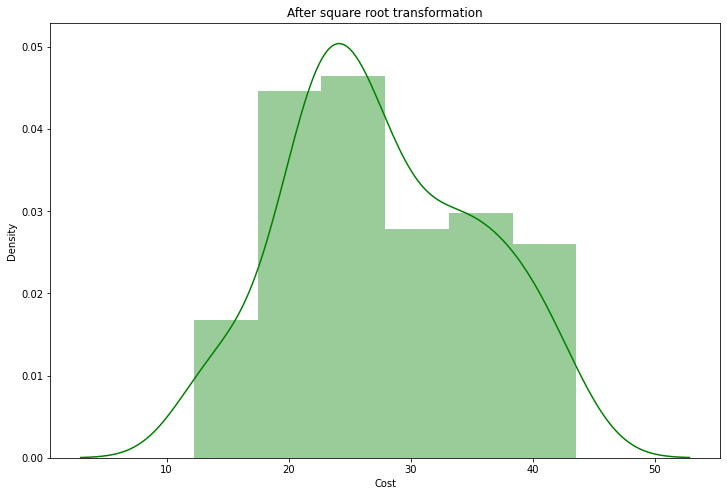

In [204]:
plt.figure(figsize=(12,8))
sns.distplot(np.sqrt(df_clust['Cost']),color="g")
plt.title('After square root transformation')
plt.show()

In [205]:
df_clust['Cost']=np.sqrt(df_clust['Cost'])

Yes, I think my Cost variable needed to be transformed, since it has skewness. Performing a transformation on the cost variable can help to reduce the range and variance of the variable. This can improve the performance of the k-means algorithm and lead to more meaningful and accurate clustering results.


After square root transformation, the distribution appears normal.

### 6. Data Scaling

In [206]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# create a StandardScaler object
scaler = StandardScaler()
df_clust['Cost']=scaler.fit_transform(df_clust[['Cost']].values)







##### Which method have you used to scale you data and why?

I used MinMax scaler to scale my data. Scaling is often recommended before performing k-means clustering. 

If the features have different scales, the distance metric can become dominated by features with larger scales. This can result in clusters that are biased towards those features with larger scales. Scaling the features can help prevent this issue.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

A good rule of thumb is that if the number of features is greater than the number of observations, dimensionality reduction should be done. Here, dimensionality reduction is not really needed since I have 103 rows and 45 columns.


Dimensionality reduction techniques such as principal component analysis (PCA) can help address these issues by reducing the number of features in the dataset while preserving the most important information. However, dimensionality reduction can also lead to loss of information and interpretability, so it's important to carefully consider the trade-offs before deciding to use it.

In [207]:
# DImensionality Reduction (If needed)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [208]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)


##### What data splitting ratio have you used and why? 

The ratio I have used is 80:20. Which means that 80% of the data is used for training and 20% of the data is used for testing. This is the most commonly used ratio for splitting the data. There does not seem to be a clear rule on what ratio is best or optimal for a given dataset, but using an 80:20 split is said to be a good bet.

### 9. Handling Imbalanced dataset

##### Do you think the dataset all is imbalanced? Explain Why.

Data imbalance usually reflects an unequal distribution of classes within a dataset i.e, one class label has a very high number of observations and the other has a very low number of observations . In my data, there is only a slight imbalance. A class imbalance is considered significant when the proportion of the minority class is less than 10% of the majority class. So for this particular example, it is not necessary to handle class imbalance.

In [209]:
# Handling Imbalanced dataset_all (If needed)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1: Naive bayes, random forest (Sentiment Analysis)

In [210]:
# ML Model - 1 Implementation
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

# Fit the Algorithm
clf = MultinomialNB()
clf.fit(X_train, y_train)
# Predict on the model
y_prednb=clf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model I used here is Multinomial Naive Bayes. It is a variant of the Naive Bayes algorithm which is based on the Bayes theorem that calculates the probability of a class given the input features. 

This is a commonly used algorithm for text classification and sentiment analysis.

In [211]:
# Visualizing evaluation Metric Score chart
print(classification_report(y_test, y_prednb))


              precision    recall  f1-score   support

           0       0.95      0.51      0.66       725
           1       0.78      0.98      0.87      1266

    accuracy                           0.81      1991
   macro avg       0.86      0.75      0.77      1991
weighted avg       0.84      0.81      0.79      1991



In [212]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
cm = confusion_matrix(y_test, y_prednb)
cm


array([[ 369,  356],
       [  19, 1247]])

#### 2. Cross- Validation & Hyperparameter Tuning

In [213]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
hyperparameters = {
    'alpha': [0.01, 0.1, 1, 10],
    'fit_prior': [True, False]
}
# Fit the Algorithm
grid_search = GridSearchCV(clf, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)
# Predict on the model
y_prednbcv = grid_search.predict(X_test)


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. I used it since it searches for the best set of hyperparameters from a grid of hyperparameters values and uses the optimal hyperparameter value.

Techniques such as GridSearch help us get the most optimal hyperparameter value, as opposed to manually entering and trying many different hyperparameter values using trial and error method.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [214]:
print(classification_report(y_test, y_prednbcv))


              precision    recall  f1-score   support

           0       0.83      0.70      0.76       725
           1       0.84      0.92      0.88      1266

    accuracy                           0.84      1991
   macro avg       0.84      0.81      0.82      1991
weighted avg       0.84      0.84      0.84      1991



In [215]:
# Confusion matrix
cm = confusion_matrix(y_test, y_prednbcv)
cm

array([[ 511,  214],
       [ 102, 1164]])

Yes, I have seen an improvement. My accuracy ,recall and f1 score. have increased after doing hyperparameter tuning.

Random forest

In [216]:
# ML Model -  Implementation
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
# Fit the Algorithm
clf.fit(X_train,y_train)
# Predict on the model
y_predrf=clf.predict(X_test)
     

Here, the ML model I used is Random Forest. It is an ensemble learning method which builds multiple decision trees on different random subsets of the training data and features.

Each tree in the forest is built using a different subset of the training data and a different subset of the features. The final output of the model is determined by aggregating the predictions of all the trees in the forest.

It can reduce overfitting as well.

In [217]:
print(classification_report(y_test, y_predrf))

              precision    recall  f1-score   support

           0       0.88      0.69      0.77       725
           1       0.84      0.95      0.89      1266

    accuracy                           0.85      1991
   macro avg       0.86      0.82      0.83      1991
weighted avg       0.86      0.85      0.85      1991



In [218]:
# Using hyperparameter tuning
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'n_estimators':[20,50, 80,100,110], 'max_depth':[3, 5, 7]}
gs= GridSearchCV(clf, parameters, cv=10)
# Fit the Algorithm
gs.fit(X_train,y_train)
# Predict on the model
ypredRFCV=gs.predict(X_test)


I used GridSearchCV for hyperparameter optimization. I used it since it searches for the best set of hyperparameters from a grid of hyperparameters values and uses the optimal hyperparameter value.

Techniques such as GridSearch help us get the most optimal hyperparameter value, as opposed to manually entering and trying many different hyperparameter values using trial and error method.

In [219]:
print(classification_report(y_test, ypredRFCV))

              precision    recall  f1-score   support

           0       1.00      0.04      0.07       725
           1       0.64      1.00      0.78      1266

    accuracy                           0.65      1991
   macro avg       0.82      0.52      0.43      1991
weighted avg       0.77      0.65      0.52      1991



There is no improvement.

### ML Model - 2: K -means  (Clustering)

In [220]:
# ML model-2 implementation
from sklearn.cluster import KMeans



/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

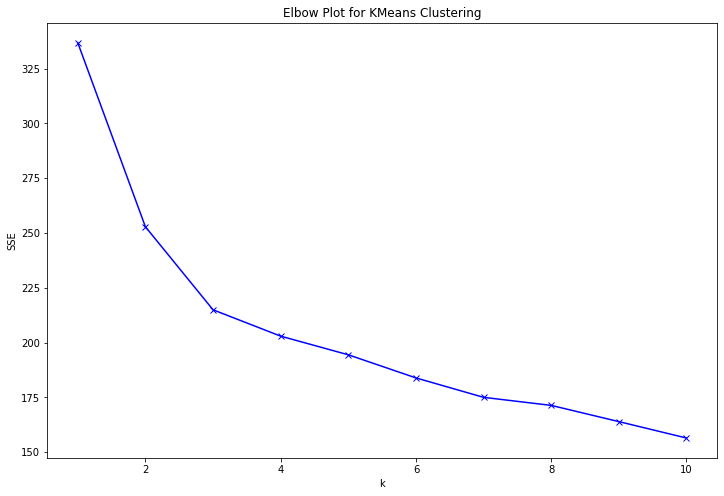

In [221]:
sse = []
k_range = range(1, 11)

# Compute SSE for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clust)
    sse.append(kmeans.inertia_)

# Plot the SSE values against k
plt.figure(figsize=(12,8)) # size of plot
plt.plot(k_range, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Plot for KMeans Clustering')
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.22460028441527657


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.1856459699683076
For n_clusters = 4 The average silhouette_score is : 0.1795202533247881


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.15476126241601887
For n_clusters = 6 The average silhouette_score is : 0.14830470777019686


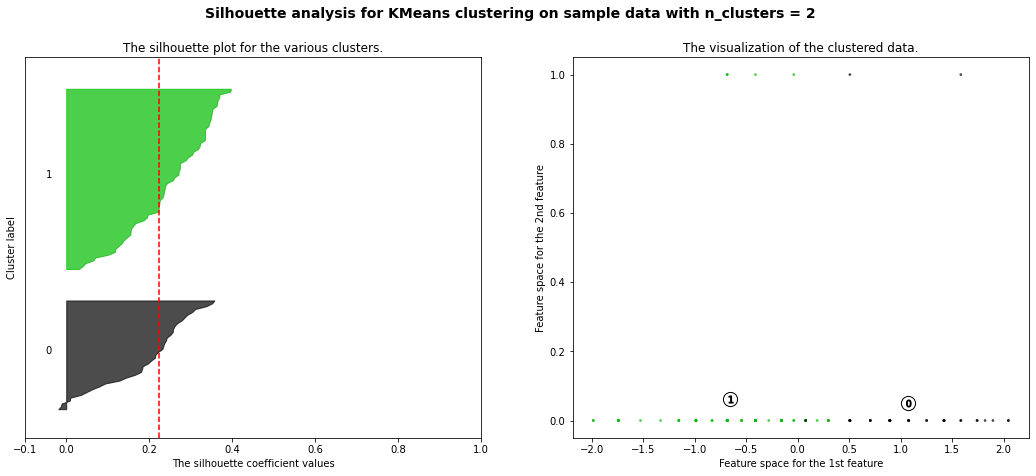

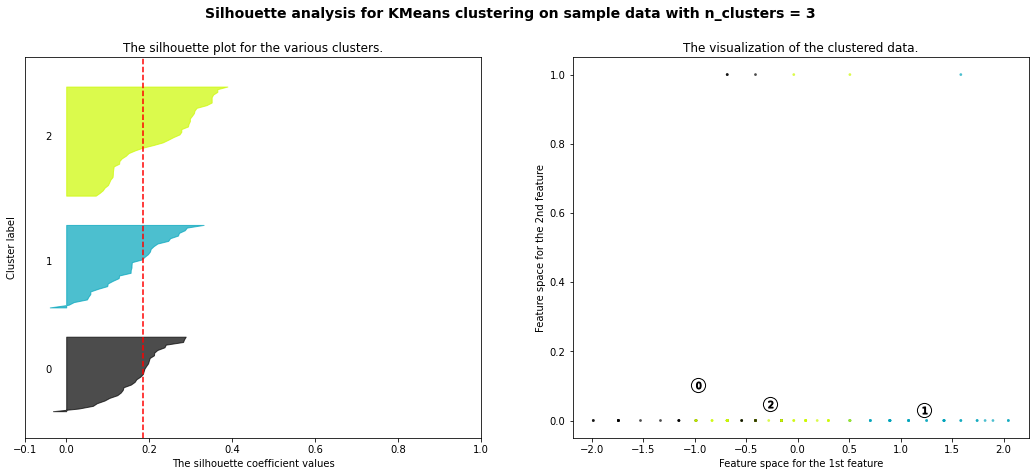

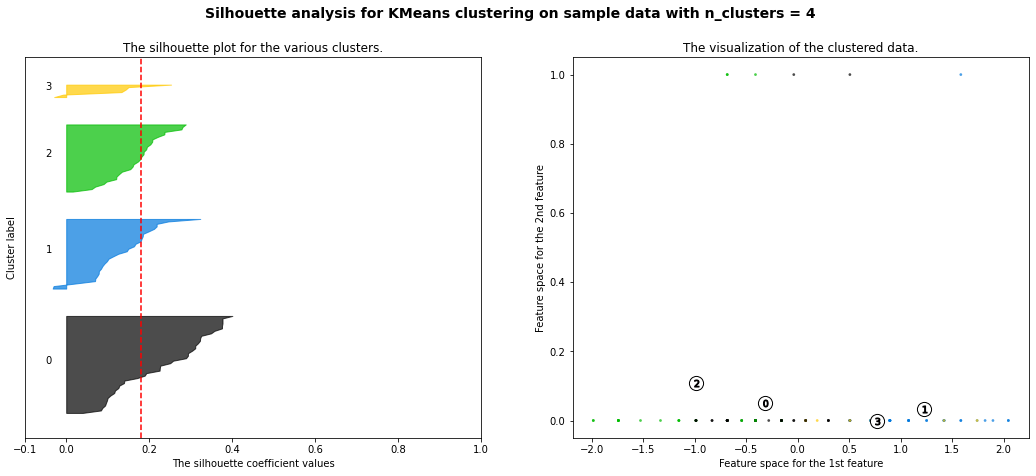

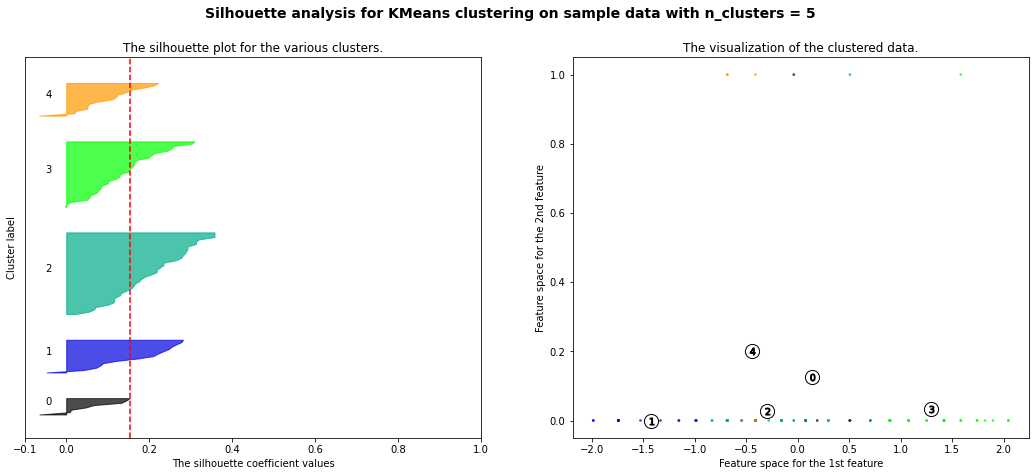

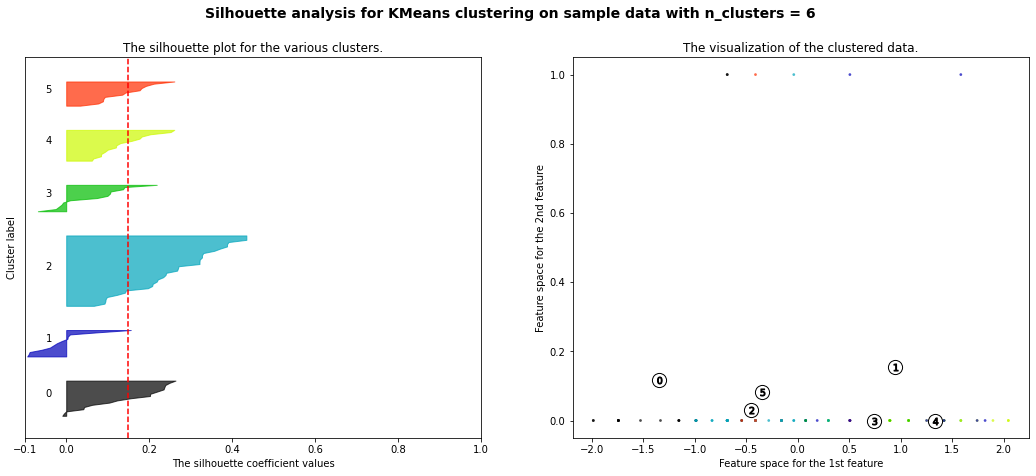

In [222]:
# Silhouette analysis 
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_clust.values) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_clust.values)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_clust.values, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_clust.values, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_clust.values[:, 0], df_clust.values[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

I can see from elbow chart and silhoutte analysis chart that my number of clusters should be 3. 

In [223]:
kmeans = KMeans(n_clusters=3,random_state=42) # initializing k means
kmeans.fit(df_clust.values) # fitting
y_kmeans = kmeans.predict(df_clust.values) # predicton
y_kmeans


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0,
       0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 2, 2, 2,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 0], dtype=int32)

In [224]:
#checking how many observations each cluster has
unique_vals, counts = np.unique(y_kmeans, return_counts=True)

# Print the results
for val, count in zip(unique_vals, counts):
    print(f"Label {val} appears {count} times.")

Label 0 appears 31 times.
Label 1 appears 41 times.
Label 2 appears 31 times.


In [225]:
df_c['cluster']=y_kmeans

In [226]:
df_c['Cuisines'] = df_c['Cuisines'].apply(lambda x : x.split(", "))
dfexp=df_c.explode("Cuisines")

In [227]:
dfexp[dfexp['cluster']==0]['Cuisines'].unique() # values in cluster 0

array(['Asian', 'Mediterranean', 'North Indian', 'Desserts',
       'Continental', 'Chinese', 'Seafood', 'Goan', 'Kebab', 'BBQ',
       'Italian', 'Finger Food', 'European', 'Japanese', 'Salad', 'Sushi',
       'American', 'Mexican', 'South Indian', 'Spanish', 'Andhra',
       'Hyderabadi', 'Modern Indian', 'Thai', 'Momos', 'Mughlai',
       'Beverages', 'Malaysian'], dtype=object)

In [228]:
dfexp[dfexp['cluster']==1]['Cuisines'].unique() # values in cluster 1

array(['Chinese', 'Continental', 'Kebab', 'European', 'South Indian',
       'North Indian', 'Biryani', 'Seafood', 'Beverages', 'Healthy Food',
       'American', 'Andhra', 'Bakery', 'Mughlai', 'Juices', 'Arabian',
       'Fast Food', 'Hyderabadi', 'Finger Food', 'Thai', 'Indonesian',
       'Asian', 'Momos', 'Italian', 'Salad', 'Burger'], dtype=object)

In [229]:
dfexp[dfexp['cluster']==2]['Cuisines'].unique() # values in cluster 2

array(['Lebanese', 'Ice Cream', 'Desserts', 'Street Food', 'North Indian',
       'Fast Food', 'Burger', 'Mughlai', 'Biryani', 'Cafe', 'Continental',
       'Bakery', 'American', 'Wraps', 'Asian', 'Beverages', 'Momos',
       'Salad', 'Pizza', 'Arabian', 'North Eastern', 'Mithai'],
      dtype=object)

I used k means for clustering.It is an unsupervised machine learning algorithm used for grouping similar data points together based on their features. The algorithm works by dividing a set of data points into a predetermined number of clusters (k), where each data point belongs to the cluster with the closest mean value.

One of the limitations of K-means clustering is that it requires the number of clusters (k) to be predetermined. Choosing the optimal value for k can be challenging and is often done through trial and error or using statistical methods such as the elbow method or silhouette score.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

To determing the optimal number of clusters I used 2 methods.

1. Elbow method: Plot the SSE values against the corresponding k values. The plot should resemble an elbow, and the optimal number of clusters will be located at the "elbow point," where the SSE begins to level off, and the reduction in SSE becomes marginal with increasing k values. 

2. Silhouette method: The optimal number of clusters can be determined by identifying the k value that results in the highest average silhouette score across all data points.

Using these 2 methods, I decided to use a k value of 3.

### ML Model - 3: Heirarchical clustering

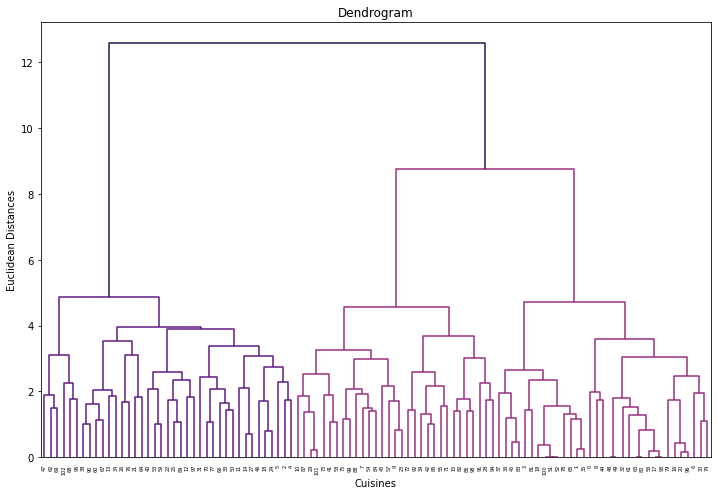

In [230]:
# ML Model - 3 Implementation
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(df_clust.values, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Cuisines')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line



In [231]:
# Fitting agglemorative hierarchical clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward') # using number of clusters as 3
y_hc = hc.fit_predict(df_clust.values) # predicting

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [232]:
unique_vals, counts = np.unique(y_hc, return_counts=True)

# Print the results
for val, count in zip(unique_vals, counts):
    print(f"Label {val} appears {count} times.")

Label 0 appears 39 times.
Label 1 appears 33 times.
Label 2 appears 31 times.


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

I used agglomerative heirarchical clustering. Agglomerative hierarchical clustering is a type of hierarchical clustering algorithm used in unsupervised machine learning to group similar data points together based on their features. In agglomerative hierarchical clustering, each data point starts as a separate cluster, and the algorithm iteratively merges the most similar clusters until all data points belong to a single cluster.

Using the dendrogram, I could see that the best number of clusters is 3.



### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Precision: Precision is defined as the ratio of correctly classified positive samples to a total number of classified positive samples.

Recall: The recall is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples.

f1-score: It combines both precision and recall.

Accuracy: It is the number of correct predictions divided by the total number of prediction. It may not be the best metric in all scenarios, especially if the classes are imbalanced.

The choice of evaluation metrics should be based on the specific business problem and the costs associated with misclassification. Therefore, it is important to understand the business impact of the ML model and choose appropriate evaluation metrics accordingly.

In this case, there is no cost associated with misclassification, so I would choose accuracy as my main metric.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would choose the Random forest model as my final prediction model since it give me a better score as compared to naive bayes classifier, in terms of the evaluation metrics that I chose.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [233]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [234]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

1. The review dataset had a slight class imbalamnce.

2. All the restaurants have equal number of rows.

3. Very few restaurants cost more than 2500

4. 5 star rating is given more frequently than others.

5. People prefer to take pictures when they give high ratings.

6. North Indian food is the most common.

7. Collage restaurant is the costliest.

8. Amul restaurant is the cheapest.

9. Most people prefer to give reviews at 10 pm.

10. Food Nawabs have taken the most pictures.

11. The Random Forest model gave me the best accuracy.

12. The optimal number of clusters for k means and heirarchial clustering is 4.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***